In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
import string

with open('stopwords.txt') as f:
    stopwords = f.read().replace('\n',' ').split()

with open('training_text.txt', encoding='utf-8') as f:
    text = f.read().replace('\n','')
    print(text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ''.join([t for t in text if t not in list('0123456789')])
    text = text.replace('”', '').replace('“', '').replace('’', '').lower().split()

text = [w for w in text if w not in stopwords][:2000]



WINDOW_SIZE = 3
NUM_NEGATIVE_SAMPLES = 3

data = []

#iterate over all words
for idx,center_word in enumerate(text[WINDOW_SIZE-1:-WINDOW_SIZE]):

    #iterate over the context words around the center word
    context_words = [context_word for context_word in text[idx:idx+2*WINDOW_SIZE-1] if context_word != center_word]
    for context_word in context_words:

        #get words NOT in the current context as negative examples
        data.append([center_word, context_word, 1])
        negative_samples = np.random.choice([w for w in text[WINDOW_SIZE-1:-WINDOW_SIZE] if w != center_word and w not in context_words], NUM_NEGATIVE_SAMPLES)

        for negative_samp in negative_samples:

            #add a training row
            data.append([center_word, negative_samp, 0])

df = pd.DataFrame(columns=['center_word', 'context_word', 'label'], data=data)
words = np.intersect1d(df.context_word, df.center_word)
df = df[(df.center_word.isin(words)) & (df.context_word.isin(words))].reset_index(drop=True)




Today we will be learning about the fundamentals of data science and statistics. Data Science and statistics are hot and growing fields with alternative names of machine learning, artificial intelligence, big data, etc. I'm really excited to talk to you about data science and statistics because data science and statistics have long been a passions of mine. I didn't used to be very good at data science and statistics but after studying data science and statistics for a long time, I got better and better at it until I became a data science and statistics expert. I'm really excited to talk to you about data science and statistics, thanks for listening to me talk about data science and statistics.


In [10]:
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

def plot_words(model, debug_words, word_to_index):
    # Extracting embeddings
    main_embeddings_np = model.main_embeddings.weight.data.numpy()
    context_embeddings_np = model.context_embeddings.weight.data.numpy()

    word1_idx = word_to_index[debug_words[0]]
    word2_idx = word_to_index[debug_words[1]]

    word1_main_embed = main_embeddings_np[word1_idx]
    word2_main_embed = main_embeddings_np[word2_idx]
    word1_context_embed = context_embeddings_np[word1_idx]
    word2_context_embed = context_embeddings_np[word2_idx]

    plt.figure(figsize=(8,4))
    
    # Plotting for main embeddings
    plt.subplot(1,2,1)
    plt.scatter(word1_main_embed[0], word1_main_embed[1], color='r')
    plt.scatter(word2_main_embed[0], word2_main_embed[1], color='r')
    plt.arrow(0,0, word1_main_embed[0], word1_main_embed[1], head_width=0.01, length_includes_head=True)
    plt.arrow(0,0, word2_main_embed[0], word2_main_embed[1], head_width=0.01, length_includes_head=True)
    plt.text(word1_main_embed[0], word1_main_embed[1], debug_words[0])
    plt.text(word2_main_embed[0], word2_main_embed[1], debug_words[1])
    plt.axvline(0, color='k', linestyle='--', alpha=0.5)
    plt.axhline(0, color='k', linestyle='--', alpha=0.5)

    t = np.arange(0, 3.14*2+0.1, 0.1)
    plt.plot(np.cos(t), np.sin(t), linewidth=1, color='k', alpha=0.5, linestyle='--')
    
    # Plotting for context embeddings
    plt.subplot(1,2,2)
    plt.scatter(word1_main_embed[0], word1_main_embed[1], color='r')
    plt.scatter(word2_context_embed[0], word2_context_embed[1], color='b')
    plt.arrow(0,0, word1_main_embed[0], word1_main_embed[1], head_width=0.01, length_includes_head=True)
    plt.arrow(0,0, word2_context_embed[0], word2_context_embed[1], head_width=0.01, length_includes_head=True)
    plt.text(word1_main_embed[0], word1_main_embed[1], debug_words[0])
    plt.text(word2_context_embed[0], word2_context_embed[1], debug_words[1])
    plt.axvline(0, color='k', linestyle='--', alpha=0.5)
    plt.axhline(0, color='k', linestyle='--', alpha=0.5)

    plt.plot(np.cos(t), linewidth=1, color='k', alpha=0.5, linestyle='--')
    epoch = 0
    for epoch in range(0, 1000, 100):
    filename = f"epoch_{epoch}.png"
    plt.savefig(filename)
    plt.close()
    return filename
    plt.show()

In [11]:

class Word2Vec(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(Word2Vec, self).__init__()
        self.main_embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.context_embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.sigmoid = nn.Sigmoid()

    def forward(self, center_words, context_words):
        center_embeddings = self.main_embeddings(center_words)
        context_embeddings = self.context_embeddings(context_words)
        scores = torch.sum(center_embeddings * context_embeddings, dim=1)
        outputs = self.sigmoid(scores)
        return outputs

class WordDataset(Dataset):
    def __init__(self, dataframe):
        self.df = dataframe

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        return self.df.iloc[idx].center_word, self.df.iloc[idx].context_word, self.df.iloc[idx].label




Epoch 1/100, Loss: 0.8349251449108124


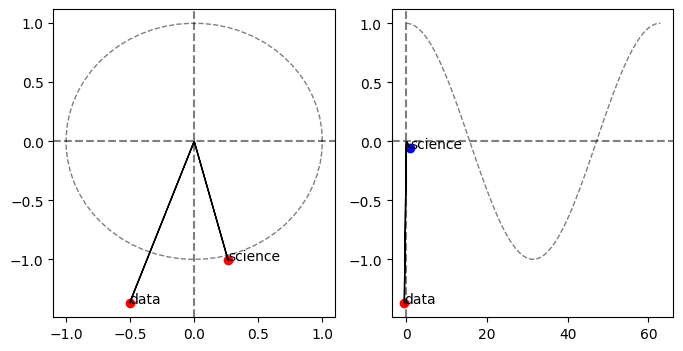

Epoch 2/100, Loss: 0.8274330757558346


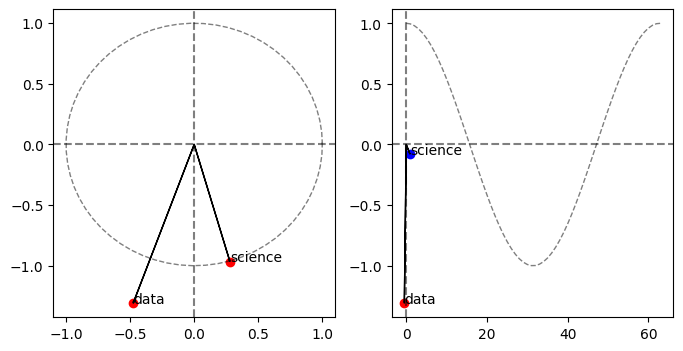

Epoch 3/100, Loss: 0.8274369053542614


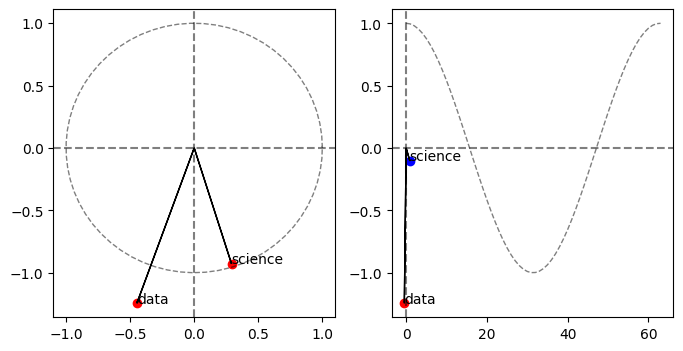

Epoch 4/100, Loss: 0.809899128973484


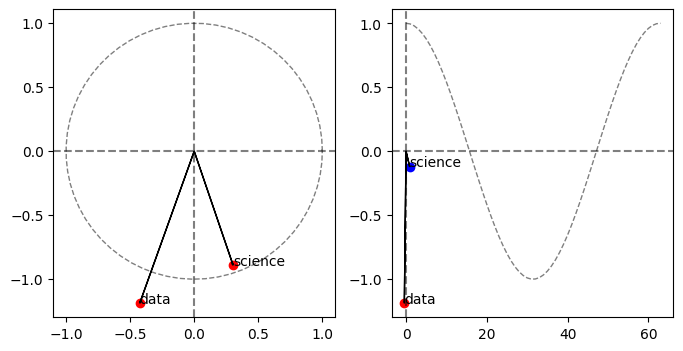

Epoch 5/100, Loss: 0.798025730997324


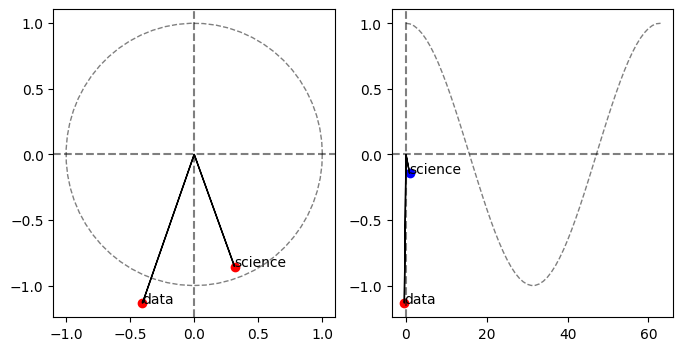

Epoch 6/100, Loss: 0.7921038307249546


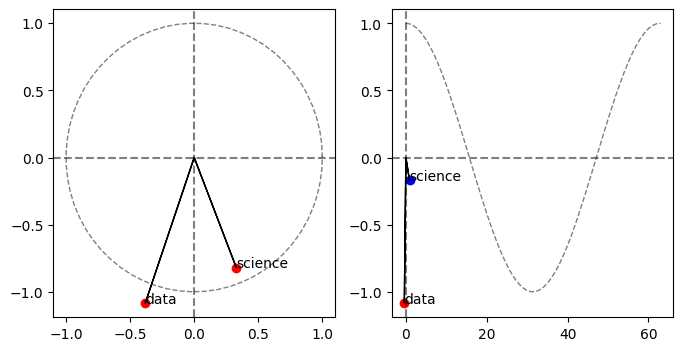

Epoch 7/100, Loss: 0.796396229416132


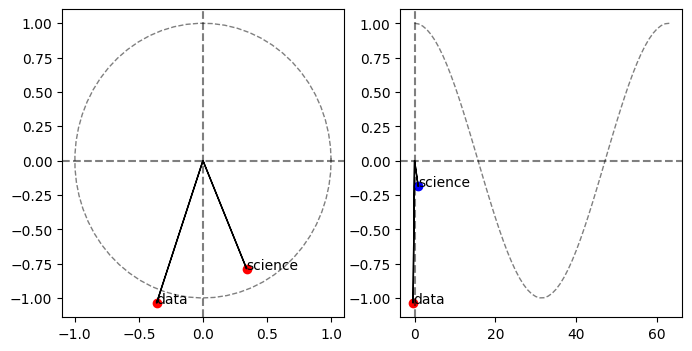

Epoch 8/100, Loss: 0.7902178503572941


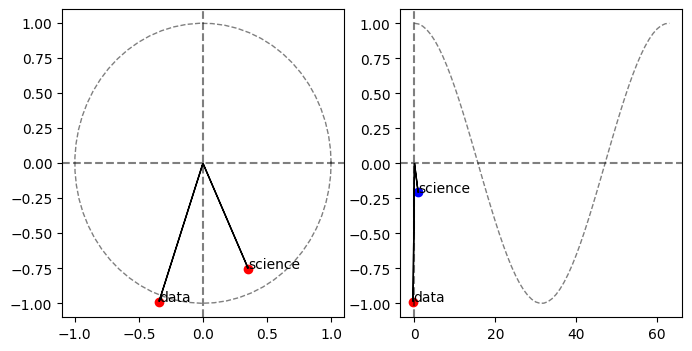

Epoch 9/100, Loss: 0.7675613351166248


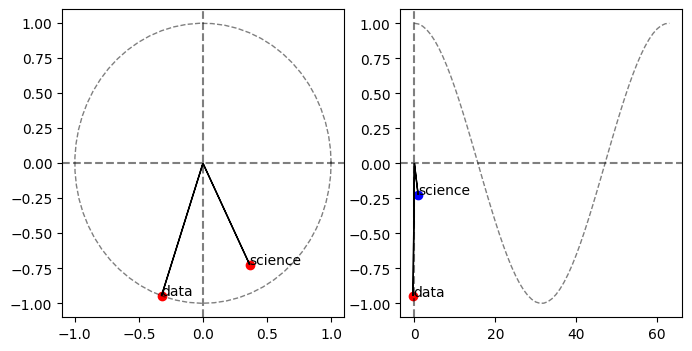

Epoch 10/100, Loss: 0.7667493596673012


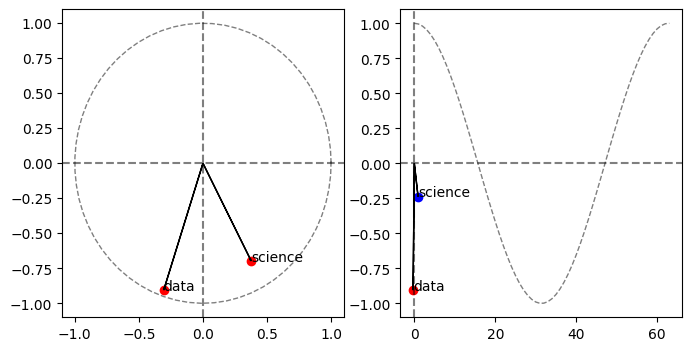

Epoch 11/100, Loss: 0.7623934037983418


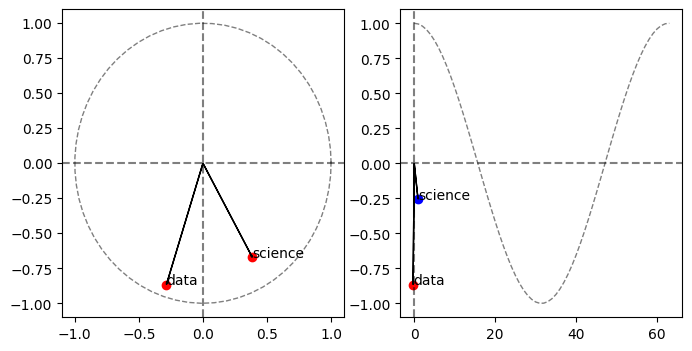

Epoch 12/100, Loss: 0.7643737234175205


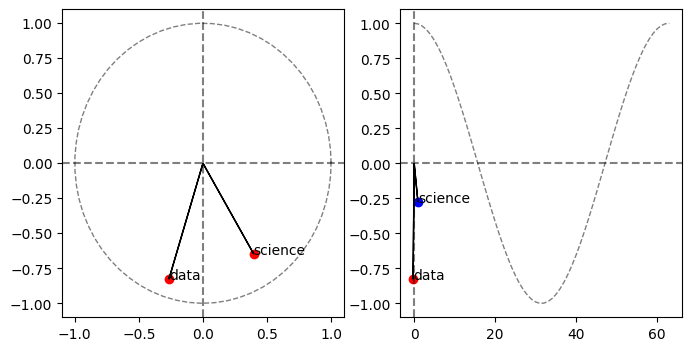

Epoch 13/100, Loss: 0.7483999840915203


KeyboardInterrupt: 

In [12]:
word_to_index = {word: idx for idx, word in enumerate(words)}
df['center_word'] = df['center_word'].apply(lambda x: word_to_index[x])
df['context_word'] = df['context_word'].apply(lambda x: word_to_index[x])

# Hyperparameters
EMBEDDING_DIM = 2
BATCH_SIZE = 64
LR = 0.1
NUM_EPOCHS = 100

# Dataset and DataLoader
dataset = WordDataset(df)
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

# Model, Loss and Optimizer
model = Word2Vec(len(word_to_index), EMBEDDING_DIM)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=LR)

for epoch in range(NUM_EPOCHS):
    total_loss = 0.0
    for center_words, context_words, labels in dataloader:
        optimizer.zero_grad()
        outputs = model(center_words, context_words)
        loss = criterion(outputs, labels.float())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f'Epoch {epoch+1}/{NUM_EPOCHS}, Loss: {total_loss/len(dataloader)}')
    
    # Visualizing the embeddings after each epoch
    plot_words(model, ['data', 'science'], word_to_index)